In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
plataformas_df = pd.read_csv('streaming.csv')

In [33]:
plataformas_df.shape

(22998, 17)

Valores Nulos , verificaremos en el modelo las variables relevantes para eliminar o imputar los valores 

In [34]:
plataformas_df.isnull().sum()

id                   0
type                 0
title                0
director          8259
cast              5321
country          11499
date_added        9554
release_year         0
rating               0
duration_int         0
duration_type      482
listed_in            0
description          4
userId               0
score                0
timestamp            0
mean_score           0
dtype: int64

In [35]:
plataformas_df.head(3)

id   type                 title      director  \
0  as1  movie   the grand seduction  don mckellar   
1  as2  movie  take care good night  girish joshi   
2  as3  movie  secrets of deception   josh webber   

                                                                                      cast  \
0                                           brendan gleeson, taylor kitsch, gordon pinsent   
1                                         mahesh manjrekar, abhay mahajan, sachin khedekar   
2  tom sizemore, lorenzo lamas, robert lasardo, richard jones, yancey arias, noel gugliemi   

         country  date_added  release_year rating  duration_int duration_type  \
0         canada  2021-03-30          2014      g           113           min   
1          india  2021-03-30          2018    13+           110           min   
2  united states  2021-03-30          2017      g            74           min   

                 listed_in  \
0            comedy, drama   
1     drama, international   
2  action, drama, suspense   

                                                                                                                                                                                                                                                                                                                                                                           description  \
0  a small fishing village must procure a local doctor to secure a lucrative business contract. when unlikely candidate and big city doctor paul lewis lands in their lap for a trial residence, the townsfolk rally together to charm him into staying. as the doctor's time in the village winds to a close, acting mayor murray french has no choice but to pull out all the stops.   
1                                                                                                                                                                                                                                                                                              a metro family decides to fight a cyber criminal threatening their stability and pride.   
2                                                                                                                                                                                                                                                            after a man discovers his wife is cheating on him with a neighborhood kid he goes down a furious path of self-destruction   

   userId  score   timestamp  mean_score  
0     543    5.0  1059596582    3.467131  
1     321    3.0  1181451581    3.548682  
2     582    5.0  1316843370    3.500000

In [36]:
plataformas_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration_int   22998 non-null  int64  
 10  duration_type  22516 non-null  object 
 11  listed_in      22998 non-null  object 
 12  description    22994 non-null  object 
 13  userId         22998 non-null  int64  
 14  score          22998 non-null  float64
 15  timestamp      22998 non-null  int64  
 16  mean_score     22998 non-null  float64
dtypes: float64(2), int64(4), object(11)
memory usage: 

Verificamos la distribucion de los score

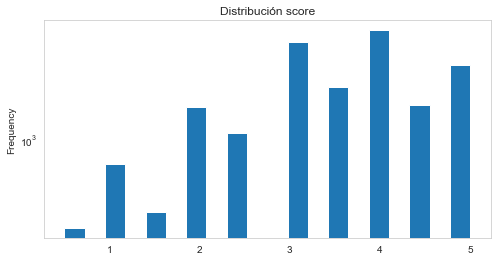

In [37]:
plt.figure(figsize = (8,4))
plataformas_df['score'].plot.hist(log=True, bins = 20)
plt.title('Distribución score')
plt.grid()
plt.show()

VERIFICAMOS OUTLIERS, dispersion y valores atipicos

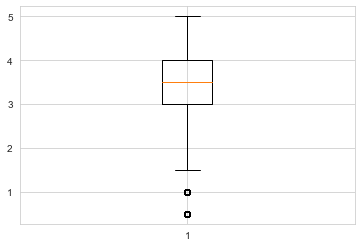

In [38]:
plt.boxplot(plataformas_df['score'])
plt.show()

Verificamos correlacion de variables, para revisar redundancias entre variables explicativas

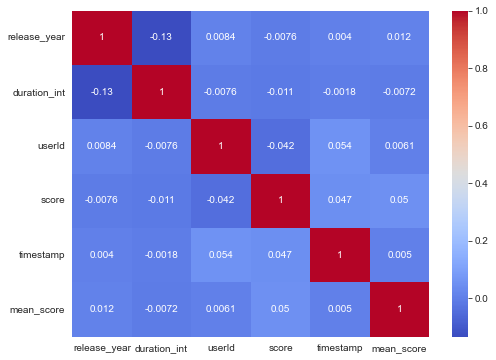

In [39]:
corr = plataformas_df.corr ()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

Graficamos pairplot matriz de diagramas de dispersión para cada par de columnas en un DataFrame, para visualizar la relación entre diferentes variables

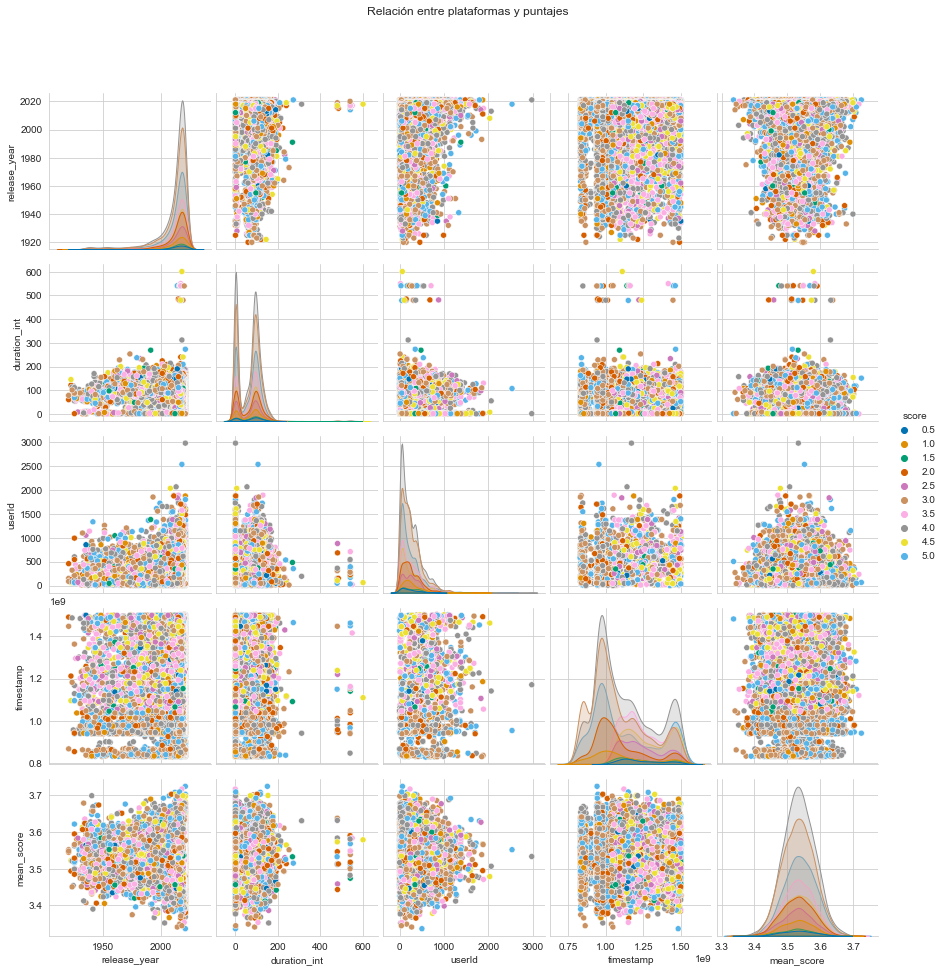

In [40]:
sns.set_style("whitegrid")
g = sns.pairplot(plataformas_df, hue="score", palette="colorblind")
g.fig.suptitle("Relación entre plataformas y puntajes", y=1.08)
plt.xlabel("Plataformas")
plt.ylabel("Puntajes")
plt.show()

BOXPLOT OUTLIERS , variable score

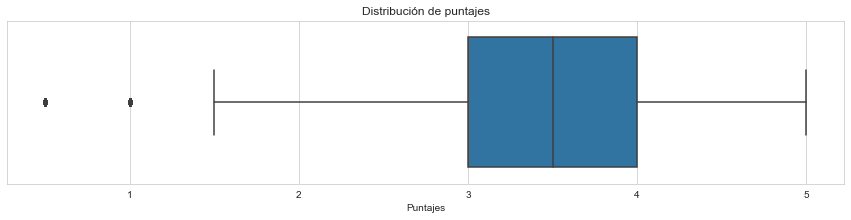

In [41]:
#Gráfico comportamiento outliers variable score

sns.set_style("whitegrid")
plt.subplots(figsize=(15,3))
sns.boxplot(x=plataformas_df[~plataformas_df['score'].isna()]['score'], linewidth=1.5)
plt.title("Distribución de puntajes")
plt.xlabel("Puntajes")
plt.show()

Top 10 del contenido mas popular, por titulo, genero tomando en cuenta el campo score 

In [46]:
# Agrupamos los datos por título, categoría y puntuación, y calculamos la media de las puntuaciones
populares = plataformas_df.groupby(['title', 'listed_in'])['score'].mean().reset_index()

# Ordenamos los datos por puntuación de mayor a menor
populares = populares.sort_values('score', ascending=False)

# Creamos un DataFrame con los 10 contenidos más populares
df_populares = pd.DataFrame(populares.head(10))

# Establecemos el estilo para el DataFrame y alineamos el texto a la izquierda
df_populares.style.set_properties(**{'text-align': 'left'})
